In [18]:
import matplotlib.pyplot as plt
import numpy as np
import math
import sounddevice as sd
import pandas as pd
from scipy.io.wavfile import write

<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:25: SyntaxWarning: invalid escape sequence '\h'
<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:25: SyntaxWarning: invalid escape sequence '\h'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14620\2178691270.py:24: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$\omega$ (cycles/s)")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14620\2178691270.py:25: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$|\hat{y}|$")


Text(0, 0.5, '$|\\hat{y}|$')

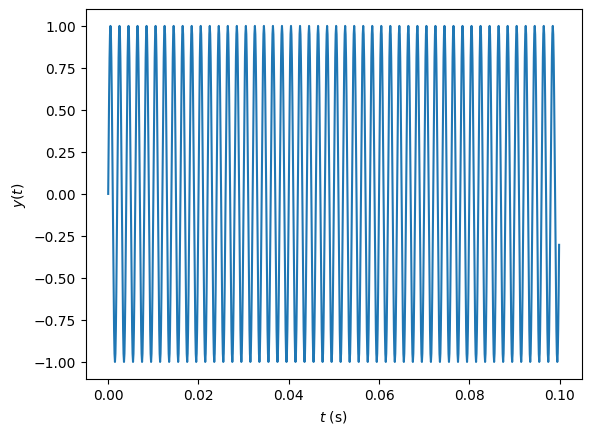

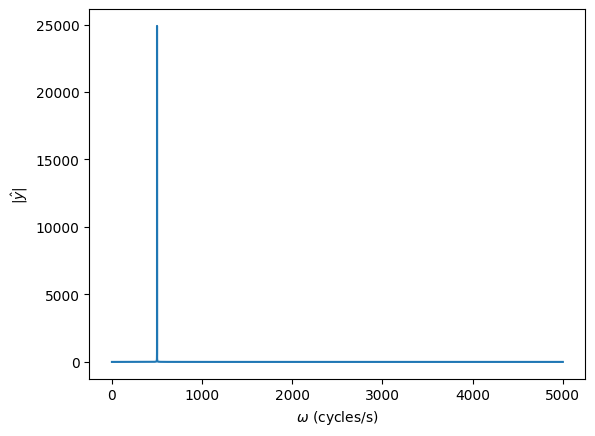

In [14]:
# Pembangkitan Sinyal
samplingFreq = 10000 # Disampling pada frekuensi 10 kHz = 10000 sampel/s
tlims = [0,5]       # batas waktu dalam detik (s)
signalFreq = 500 # dalam Hz
signalMag = 1 # magnitude
t = np.linspace(tlims[0],tlims[1],(tlims[1]-tlims[0])*samplingFreq)
y = signalMag*np.sin(2*math.pi*signalFreq*t)

# Plot Sinyal Dalam Domain Waktu
plt.figure()
plt.plot(t[:1000],y[:1000])
plt.ylabel("$y(t)$")
plt.xlabel("$t$ (s)")
# plt.xlim([min(t),max(t)])

# Hitung Transformasi Fourier
yhat = np.fft.fft(y)
fcycles = np.fft.fftfreq(len(t), d=1.0/samplingFreq); # Frekuensi dalam rad/s

# Plot Sinyal Dalam Domain Frekuensi (Power spectrum)
plt.figure()
plt.plot(fcycles[:len(fcycles)//2],np.absolute(yhat[:len(fcycles)//2]))
# plt.xlim([-100,100])
plt.xlabel("$\omega$ (cycles/s)")
plt.ylabel("$|\hat{y}|$")

In [15]:
# Play the wave as sound
sd.play(y, samplerate=samplingFreq)  # Play the signal
sd.wait()  # Wait until playback finishes

print("Playback complete.")

Playback complete.


In [ ]:
# Save as WAV file
output_filename = "generated_sinusoid_sound.wav"
scaled_y = (y * 32767).astype(np.int16)  # Scale to 16-bit PCM format
write(output_filename, samplingFreq, scaled_y)
print(f"Audio saved as {output_filename}")

Audio saved as generated_sound.wav
